In [19]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import pickle
import os


In [20]:
#set file tags:
tag='Multispectral, Biofouled: ' 
tag_longdescription="Simulation for nadir viewing, 13 channel sensor [412, 443, 469, 488, 531, 547, 555, 645, 667, 678, 748, 859, 869] nm"
filetag='SQOOP_Amir_v4_BFunc'

In [21]:
#make directories and set figure output names
figurepath='figures/'+filetag
try: 
    os.mkdir(figurepath)
except OSError as error: 
    print(error)  
    
figurepath_indiv=figurepath+'/individual/'
try: 
    os.mkdir(figurepath_indiv)
except OSError as error: 
    print(error) 
    
fig_outname=figurepath+'/'+filetag+'_gyre'
fig_outname_indiv=figurepath_indiv+'/'+filetag+'_gyre'

[Errno 17] File exists: 'figures/SQOOP_Amir_v4_BFunc'
[Errno 17] File exists: 'figures/SQOOP_Amir_v4_BFunc/individual/'


In [22]:
# read pickle files as dataframes
outname='data/'+filetag
df_name=outname+'_df.pkl'
fdfe_name=outname+'_fdfe.pkl'
vars_name=outname+'_vars.pkl'

f = open(vars_name, 'rb')
waveln,meas,rel_err,sys_err,jac_all = pickle.load(f)
f.close()

df = pd.read_pickle(df_name)
fdfe_in = pd.read_pickle(fdfe_name)
fdfe_in

# remove dataframe elements as selected

fdfe=fdfe_in
fdfe.drop(fdfe.loc[fdfe['Windspeed(m_s)']!=5.0].index, inplace=True)
fdfe.drop(fdfe.loc[fdfe['chla(mg_m3)']!=0.5].index, inplace=True)
fdfe.drop(fdfe.loc[fdfe['AOD(869)']<0.15].index, inplace=True)
fdfe.drop(fdfe.loc[fdfe['solz']<30.0].index, inplace=True)
fdfe.drop(fdfe.loc[fdfe['FMF']>0.5].index, inplace=True)


fdfe



,Windspeed(m_s),Humidity(%),FMF,AOD(869),chla(mg_m3),plastic_threshold,solz,relaz,senz,plastic_unc_median,SIC_median,plastic_avgK_median,DFS_median,Cor_5_0_median,Cor_5_1_median,Cor_5_2_median,Cor_5_3_median,Cor_5_4_median
4653,5.0,30.1,0.01,0.15,0.5,0.025197,30.0,40.0,15.0,0.013904,10.241419,0.999225,3.288030,0.876151,0.000007,0.006383,0.142727,0.118185
4654,5.0,30.1,0.01,0.15,0.5,0.024676,30.0,40.0,30.0,0.013496,10.962170,0.999270,3.694161,0.769535,0.000078,0.012758,0.038093,0.047482
4655,5.0,30.1,0.01,0.15,0.5,0.018498,30.0,40.0,60.0,0.010537,11.556202,0.999555,3.570985,0.006093,0.003736,0.210075,0.723046,0.017453
4656,5.0,30.1,0.01,0.15,0.5,0.013840,30.0,110.0,15.0,0.008131,11.253303,0.999734,3.282139,0.051972,0.049186,0.007231,0.334466,0.093583
4657,5.0,30.1,0.01,0.15,0.5,0.012064,30.0,110.0,30.0,0.007242,11.109447,0.999788,3.142147,0.000497,0.018237,0.042804,0.960939,0.041588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,5.0,94.9,0.50,0.30,0.5,0.008987,60.0,110.0,30.0,0.005567,11.801778,0.999876,3.712981,0.052429,0.002516,0.002328,0.014511,0.009290
8231,5.0,94.9,0.50,0.30,0.5,0.020322,60.0,110.0,60.0,0.011810,10.955267,0.999442,3.789606,0.005578,0.189000,0.001828,0.076602,0.034136
8232,5.0,94.9,0.50,0.30,0.5,0.010082,60.0,170.0,15.0,0.006209,12.196929,0.999845,3.842832,0.004107,0.305029,0.001560,0.191691,0.016585
8233,5.0,94.9,0.50,0.30,0.5,0.018903,60.0,170.0,30.0,0.010892,12.148418,0.999525,3.898710,0.008752,0.691037,0.000689,0.451849,0.009857


In [23]:
#calculates the probability of detection given the parameter value (mu) and uncertainty (sigma)
#assumes PDF is gaussian normally distributed
def detect_prob(mu, sigma, doprint=0): 

    Pd = 1-0.5*(1+erf((-1*mu)/(sigma*np.sqrt(2))))  #detection probability, modified from CDF function

    Pd_pcnt_str=str(np.around(Pd*100,decimals=1))+'% positive probability' #string output version

    if doprint > 0:
        print(Pd_pcnt_str)

    return Pd, Pd_pcnt_str

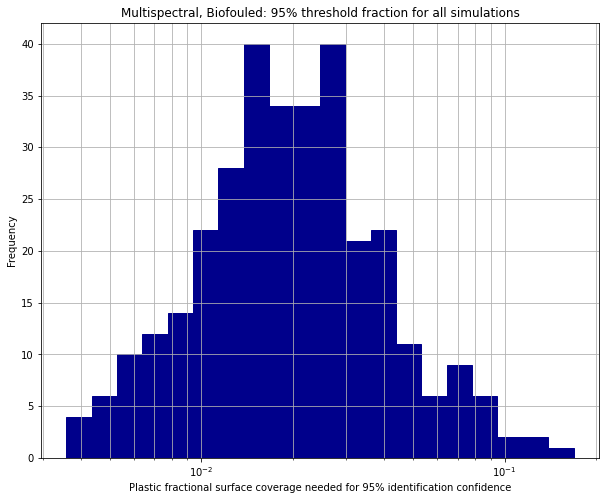

In [24]:
bn=20

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction for all simulations'
plt.title(titl)

this=fdfe['plastic_threshold']
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,label='FMF=0.01',color='darkblue',edgecolor='darkblue')

plt.xlabel('Plastic fractional surface coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')

fig_filename = fig_outname+'_all.pdf'
plt.savefig(fig_filename)
plt.show()

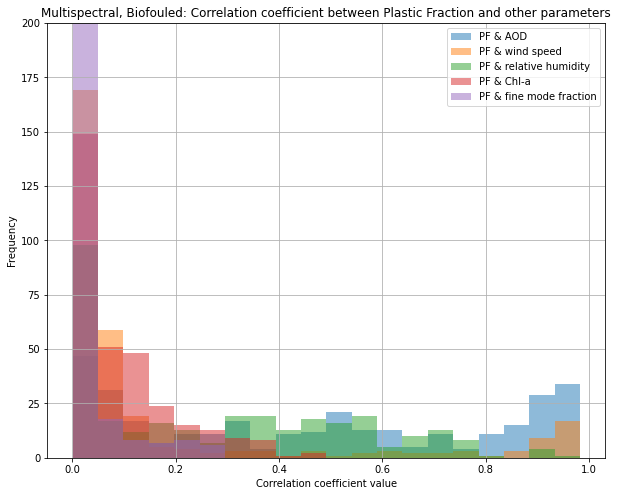

In [25]:
#    df.loc[idx]["Cor_5_0"]=Cor[5,0] #these are correlation for plastic fraction with: wind speed
#    df.loc[idx]["Cor_5_1"]=Cor[5,1] #these are correlation for plastic fraction with: relative humidity
#    df.loc[idx]["Cor_5_2"]=Cor[5,2] #these are correlation for plastic fraction with: fine mode fraction
#    df.loc[idx]["Cor_5_3"]=Cor[5,3] #these are correlation for plastic fraction with: AOD
#    df.loc[idx]["Cor_5_4"]=Cor[5,4] #these are correlation for plastic fraction with: Chl-a  

bn=20

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + 'Correlation coefficient between Plastic Fraction and other parameters'
plt.title(titl)


this=fdfe['Cor_5_3_median']
hist, bins = np.histogram(this, bins=bn)
plt.hist(this, bins=bins,alpha=0.5,label='PF & AOD')

this=fdfe['Cor_5_0_median']
hist, bins = np.histogram(this, bins=bins)
plt.hist(this, bins=bins,alpha=0.5,label='PF & wind speed')

this=fdfe['Cor_5_1_median']
hist, bins = np.histogram(this, bins=bins)
plt.hist(this, bins=bins,alpha=0.5,label='PF & relative humidity')

this=fdfe['Cor_5_4_median']
hist, bins = np.histogram(this, bins=bins)
plt.hist(this, bins=bins,alpha=0.5,label='PF & Chl-a')

this=fdfe['Cor_5_2_median']
hist, bins = np.histogram(this, bins=bins)
plt.hist(this, bins=bins,alpha=0.5,label='PF & fine mode fraction')


plt.legend(loc='upper right') 
plt.xlabel('Correlation coefficient value')
plt.ylabel('Frequency')

plt.ylim([0,200])

fig_filename = fig_outname+'_COR_all.pdf'
plt.savefig(fig_filename)
plt.show()